<a href="https://colab.research.google.com/github/belmufti/belmufti/blob/main/Code_Happy_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [6]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    return train_x, train_y, test_x, test_y



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [23]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("/content/train_happy.h5","/content/test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/.(1).
X_test = X_test_orig/.(1).


Y_train = Y_train_orig
Y_test = Y_test_orig


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: (.(2).,.(3).,.(4).,.(5).)" )
print ("Y_train shape: (.(6).,)" )


number of training examples = 600
number of test examples = 150
X_train shape: (.(2).,.(3).,.(4).,.(5).)
Y_train shape: (.(6).,)


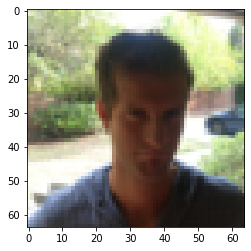

In [9]:
# Visuzaliser la 11 ème image du train data set.
imshow(.(7).)

# Building Model

In [10]:

model = Sequential([Conv2D(filters=.(8)., kernel_size=(.(9).,.(9).), activation='.(10).', padding='.(11).', input_shape=(64, 64, 3)),
                        .(12).,
                        MaxPooling2D(pool_size=(.(13).,.(13).)),
                        Dropout(0.2),
                        Conv2D(filters=.(14)., kernel_size=(.(15)., .(15).), activation='.(16).', padding='.(17).'),
                        .(18).,
                        MaxPooling2D(pool_size=(.(19)., .(19).)),
                        Dropout(0.2),
                        .(20).,                
                        .(21).
                     
                     ])
    

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        4624      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 16)       6

In [12]:
model.compile(optimizer='.(22).', loss='.(23).', metrics=[".(24)."])

In [13]:
from keras.callbacks import EarlyStopping
mycallbacks = [EarlyStopping(monitor='val_accuracy', patience=.(25).)]

In [15]:
history_model = model.fit(.(26).,validation_data=(.(27).) , epochs=.(28)., batch_size=.(29).,verbose=1,callbacks=.(30).)

Epoch 1/30
19/19 [==============================] - 5s 268ms/step - loss: 0.1576 - accuracy: 0.9283 - val_loss: 1.0672 - val_accuracy: 0.4400
Epoch 2/30
19/19 [==============================] - 5s 269ms/step - loss: 0.1428 - accuracy: 0.9400 - val_loss: 0.9983 - val_accuracy: 0.4467
Epoch 3/30
19/19 [==============================] - 5s 270ms/step - loss: 0.1273 - accuracy: 0.9600 - val_loss: 0.9608 - val_accuracy: 0.5067
Epoch 4/30
19/19 [==============================] - 5s 269ms/step - loss: 0.1044 - accuracy: 0.9567 - val_loss: 1.0263 - val_accuracy: 0.5067
Epoch 5/30
19/19 [==============================] - 5s 271ms/step - loss: 0.1137 - accuracy: 0.9567 - val_loss: 0.7610 - val_accuracy: 0.6067
Epoch 6/30
19/19 [==============================] - 5s 272ms/step - loss: 0.1346 - accuracy: 0.9500 - val_loss: 0.6255 - val_accuracy: 0.6533
Epoch 7/30
19/19 [==============================] - 5s 267ms/step - loss: 0.1119 - accuracy: 0.9617 - val_loss: 0.4540 - val_accuracy: 0.7600
Epoch 